<a href="https://colab.research.google.com/github/SamHollings/covid19_analysis/blob/main/NHSEI_%26_Cambridge_CPAS_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration of Cambridge CPAS paper
I'm going to work through the Cambridge CPAS paper taking notes on the various bits for later reference
https://arxiv.org/pdf/2007.13825.pdf


## Get the data
Below are a bunch of functions to pull the NHSE API data (tests, cases, admissions, ventilated beds) for national right down to lower tier local authority. There are also functions to grab the google and apple mobility data:
- df_england_nhse_feed
- df_gb_google_mobility_report
- df_apple_mobility_report

### Import from gitlab

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#%cd gdrive/My Drive/Python
#!git clone https://github.com/SamHollings/covid19_analysis.git

In [3]:
%cd gdrive/My Drive/Python/covid19_analysis/

[Errno 2] No such file or directory: 'gdrive/My Drive/Python'
/content/gdrive/My Drive/Python
fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [14]:
!git pull

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/SamHollings/covid19_analysis
   bf116af..90b4ffa  main       -> origin/main
Updating bf116af..90b4ffa
Fast-forward
 covid_data.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [15]:
import covid_data

### pull the data

#### NHS England tests data

In [199]:
query_filters = [f"areaType=nation;areaName=england"]

query_structure = {"date": "date",
                   "areatype": "areaType",
                  "name": "areaName",
                  "code": "areaCode",
                  "newAdmissions": "newAdmissions",
                  "newPillarTwoTestsByPublishDate": "newPillarTwoTestsByPublishDate",
                  "plannedCapacityByPublishDate" : "plannedCapacityByPublishDate",
                  "newTestsByPublishDate": "newTestsByPublishDate",
                  "covidOccupiedMVBeds": "covidOccupiedMVBeds",
                   "hospitalCases":"hospitalCases",
                   "newCasesBySpecimenDate":"newCasesBySpecimenDate",
                   "newCasesByPublishDate":"newCasesByPublishDate",
                   "cumCasesByPublishDate":"cumCasesByPublishDate",
                   "newDeaths28DaysByPublishDate":"newDeaths28DaysByPublishDate",
                   "maleCases":"maleCases",
                   "femaleCases":"femaleCases"}

data_raw = covid_data.get_paginated_dataset(query_filters, query_structure).dropna(how='all',axis=1).sort_values('date')
df_england_nhse_feed = data_raw
df_uk_wide_nhse_feed = covid_data.get_paginated_dataset([f"areaType=overview"], query_structure).dropna(how='all',axis=1).sort_values('date')
df_nhsregion_nhse_feed = covid_data.get_paginated_dataset([f"areaType=nhsRegion"], query_structure).dropna(how='all',axis=1).sort_values('date')
df_region_nhse_feed = covid_data.get_paginated_dataset([f"areaType=region"], query_structure).dropna(how='all',axis=1).sort_values('date')
df_utla_nhse_feed = covid_data.get_paginated_dataset([f"areaType=utla"], query_structure).dropna(how='all',axis=1).sort_values('date')

Had to break up to Lower Trier Local Authority as the number of pages was causing the API to time out

In [179]:
query_structure = {"date": "date",
                   "areatype": "areaType",
                  "name": "areaName",
                  "code": "areaCode",
                   #"newCasesBySpecimenDate":"newCasesBySpecimenDate",
                   "newCasesByPublishDate":"newCasesByPublishDate",
                   "newDeaths28DaysByPublishDate":"newDeaths28DaysByPublishDate",}
df_ltla_nhse_feed_1 = covid_data.get_paginated_dataset([f"areaType=ltla"], query_structure,end_page=30).dropna(how='all',axis=1)#.sort_values('date')

In [180]:
df_ltla_nhse_feed_2 = covid_data.get_paginated_dataset([f"areaType=ltla"], query_structure,start_page = 30, end_page=40).dropna(how='all',axis=1)#.sort_values('date')

In [183]:
df_ltla_nhse_feed_3 = covid_data.get_paginated_dataset([f"areaType=ltla"], query_structure,start_page = 40, end_page= 44).dropna(how='all',axis=1)

https://api.coronavirus.data.gov.uk/v1/data?filters=areaType%3Dltla&structure=%7B%22date%22%3A%22date%22%2C%22areatype%22%3A%22areaType%22%2C%22name%22%3A%22areaName%22%2C%22code%22%3A%22areaCode%22%2C%22newCasesByPublishDate%22%3A%22newCasesByPublishDate%22%2C%22newDeaths28DaysByPublishDate%22%3A%22newDeaths28DaysByPublishDate%22%7D&format=json&page=41
Reached page 41
HTTPSConnectionPool(host='api.coronavirus.data.gov.uk', port=443): Read timed out. (read timeout=10)


In [186]:
df_ltla_nhse_feed_4 = covid_data.get_paginated_dataset([f"areaType=ltla"], query_structure,start_page = 44, end_page=46).dropna(how='all',axis=1)

https://api.coronavirus.data.gov.uk/v1/data?filters=areaType%3Dltla&structure=%7B%22date%22%3A%22date%22%2C%22areatype%22%3A%22areaType%22%2C%22name%22%3A%22areaName%22%2C%22code%22%3A%22areaCode%22%2C%22newCasesByPublishDate%22%3A%22newCasesByPublishDate%22%2C%22newDeaths28DaysByPublishDate%22%3A%22newDeaths28DaysByPublishDate%22%7D&format=json&page=44
Reached page 44
HTTPSConnectionPool(host='api.coronavirus.data.gov.uk', port=443): Read timed out. (read timeout=10)


In [185]:
df_ltla_nhse_feed_5 = covid_data.get_paginated_dataset([f"areaType=ltla"], query_structure,start_page = 46).dropna(how='all',axis=1)

In [ ]:
df_ltla_nhse_feed = pd.concat([df_ltla_nhse_feed_1, df_ltla_nhse_feed_2, df_ltla_nhse_feed_3, df_ltla_nhse_feed_4, df_ltla_nhse_feed_5], axis=0)
df_ltla_nhse_feed[df_ltla_nhse_feed.code.str.contains("E")].set_index(['date','name'])['newCasesByPublishDate'].unstack()[['Swindon','Leeds','Liverpool']]#.plot()

#### Google Mobility UK/GB data

In [20]:
df_gb_google_mobility_report = covid_data.google_mobility()

#### Apple Mobility Data

In [18]:
df_apple_mobility_report = covid_data.apple_mobility()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


### plot the raw data

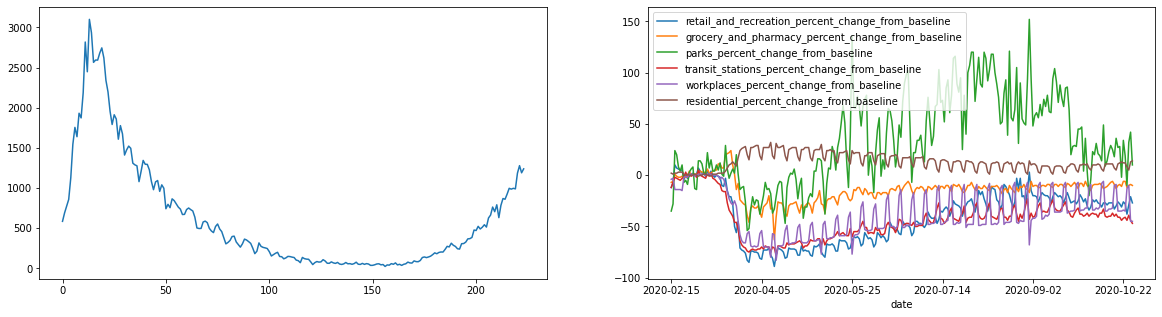

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize = (20,5));
# NHS England tests data
data_raw.reset_index(drop=False).newAdmissions.plot(ax=ax[0]);
# Google mobility
(df_gb_google_mobility_report[df_gb_google_mobility_report.sub_region_1.isna()]
 .set_index('date')[['retail_and_recreation_percent_change_from_baseline',
                    'grocery_and_pharmacy_percent_change_from_baseline',
                    'parks_percent_change_from_baseline',
                    'transit_stations_percent_change_from_baseline',
                    'workplaces_percent_change_from_baseline',
                    'residential_percent_change_from_baseline']]).plot(ax=ax[1]);

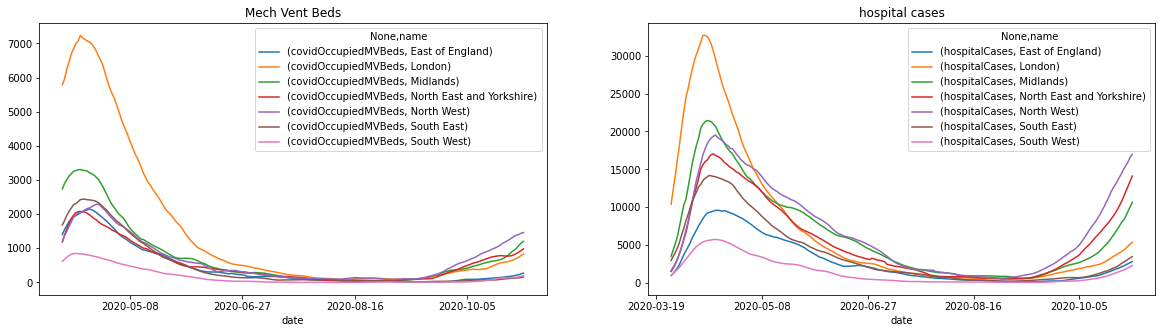

In [87]:
fig,ax = plt.subplots(1,2, figsize = (20,5));
df_nhsregion_nhse_feed.set_index(['date','name'])[['covidOccupiedMVBeds']].unstack().rolling(7).sum().plot(ax=ax[0],title='Mech Vent Beds');
df_nhsregion_nhse_feed.set_index(['date','name'])[['hospitalCases']].unstack().rolling(7).sum().plot(ax=ax[1],title='hospital cases');

## NHS England model


### Model Background
Richard's curve : https://en.wikipedia.org/wiki/Generalised_logistic_function#:~:text=The%20generalised%20(generalized)%20logistic%20function,%3D%20time.

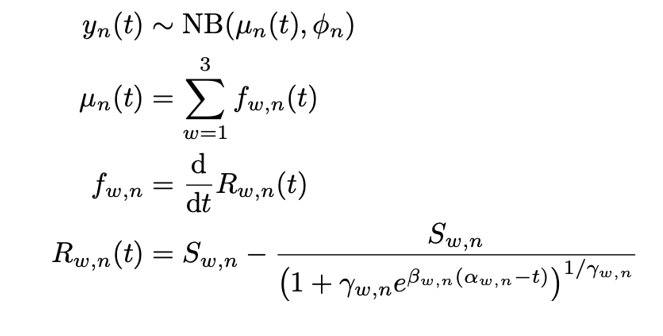

I think maybe they got it wrong above...? This seems more sensible (with the alpha and t reversed:

<a href="https://www.codecogs.com/eqnedit.php?latex=\large&space;R_{w,n}(t)&space;=&space;S_{w,n}&space;-&space;\frac&space;{S_{w,n}}{(1&plus;\gamma_{w,n}e^{\beta_{w,n}(t-\alpha_{w,n})})^{1/\gamma_{w,n}}}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\large&space;R_{w,n}(t)&space;=&space;S_{w,n}&space;-&space;\frac&space;{S_{w,n}}{(1&plus;\gamma_{w,n}e^{\beta_{w,n}(t-\alpha_{w,n})})^{1/\gamma_{w,n}}}" title="\large R_{w,n}(t) = S_{w,n} - \frac {S_{w,n}}{(1+\gamma_{w,n}e^{\beta_{w,n}(t-\alpha_{w,n})})^{1/\gamma_{w,n}}}" /></a>

The above is actually a solution to a differential equation:
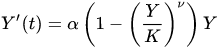

The differential can be put in the form: 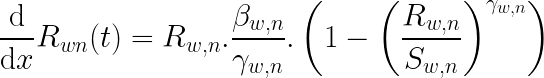

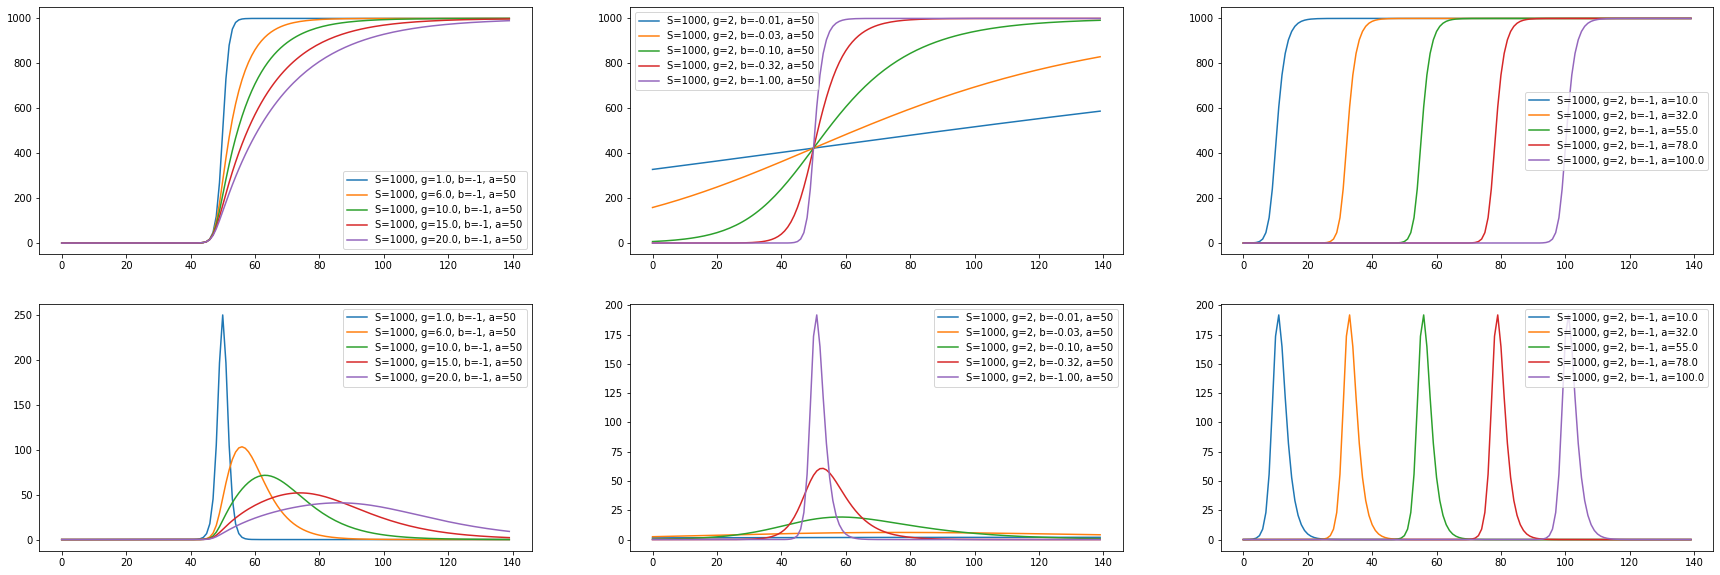

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def richards(t,S,gamma,beta,alpha):
  return S- S / (1 + gamma * np.exp(beta * (alpha-t)))**(1 / gamma)
def richards_grad(t,S, gamma, beta, alpha):
  return -1*(beta/gamma)*(1-(richards(t, S, gamma, beta, alpha)/S)**gamma)*richards(t,S,gamma,beta,alpha)

S = 1000
gamma = 2
beta = -1
alpha = 50
t_max = 140
fig, ax = plt.subplots(2, 3, figsize = (30,10))
for gamma_ in np.round(np.linspace(1,20,5)):
  pd.Series([richards(t, S , gamma_, beta, alpha) for t in range(0,t_max)], name=f'S={S}, g={gamma_}, b={beta}, a={alpha}').plot(legend=True, ax=ax[0][0])
  pd.Series([richards_grad(t, S , gamma_, beta, alpha) for t in range(0,t_max)], name=f'S={S}, g={gamma_}, b={beta}, a={alpha}').plot(legend=True, ax=ax[1][0])
for beta_ in -1*np.logspace(-2,0,5):
  pd.Series([richards(t, S , gamma, beta_, alpha) for t in range(0,t_max)], name=f'S={S}, g={gamma}, b={beta_:.2f}, a={alpha}').plot(legend=True, ax=ax[0][1])
  pd.Series([richards_grad(t, S , gamma, beta_, alpha) for t in range(0,t_max)], name=f'S={S}, g={gamma}, b={beta_:.2f}, a={alpha}').plot(legend=True, ax=ax[1][1])
for alpha_ in np.round(np.linspace(10,100,5)):
  pd.Series([richards(t, S , gamma, beta, alpha_) for t in range(0,t_max)], name=f'S={S}, g={gamma}, b={beta}, a={alpha_}').plot(legend=True, ax=ax[0][2])
  pd.Series([richards_grad(t, S , gamma, beta, alpha_) for t in range(0,t_max)], name=f'S={S}, g={gamma}, b={beta}, a={alpha_}').plot(legend=True, ax=ax[1][2])

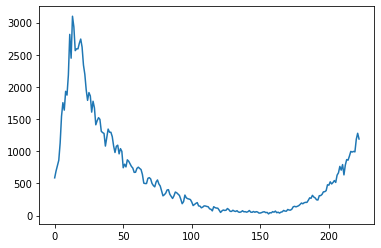

In [ ]:
data_raw.reset_index(drop=False).newAdmissions.plot()

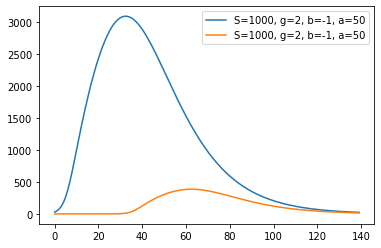

In [ ]:
initial_guess_w1 = dict(S = 80_000,gamma = 9.0,beta = -0.5,alpha = 10,)
initial_guess_w2 = dict(S = 10_000,gamma = 9.0,beta = -0.5,alpha = 40,)
pd.Series([richards_grad(t, **initial_guess_w1) for t in range(0,t_max)], name=f'S={S}, g={gamma}, b={beta}, a={alpha}').plot(legend=True)
pd.Series([richards_grad(t, **initial_guess_w2) for t in range(0,t_max)], name=f'S={S}, g={gamma}, b={beta}, a={alpha}').plot(legend=True)

In their model the values are somewhat empirical, but Alpha is the rough time of the peak, then beta and gamma determine the size and skew. 

### Fitting the model

#### First using SciPy optimize

In [ ]:
def two_peaks_model(t, S1,gamma1,beta1,alpha1,S2,gamma2,beta2,alpha2):
  return richards_grad(t, S1,gamma1,beta1,alpha1) + richards_grad(alpha1,S2,gamma2,beta2,alpha2)

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


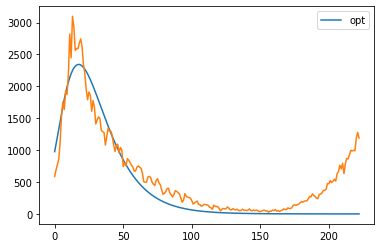

In [ ]:
import scipy
import scipy.optimize as opt
x_data = np.atleast_1d(data_raw.iloc[:150,:].reset_index().index)
y_data = np.atleast_1d(data_raw.iloc[:150,:].newAdmissions)
w1 = pd.Series(initial_guess_w1)
w2 = pd.Series(initial_guess_w2)
p0 = w1.append(w2).values

popt, pcov = opt.curve_fit(two_peaks_model, x_data, y_data,p0=p0)

pd.Series([two_peaks_model(t, *popt) for t in range(0,len(data_raw))], name=f'opt').plot(legend=True)
data_raw.reset_index(drop=False).newAdmissions.plot()

#### BAyesian model


##### Pystan


In [ ]:
pip install pystan

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_19a09b474d1901f191444eaf8a6b8ce2 NOW.


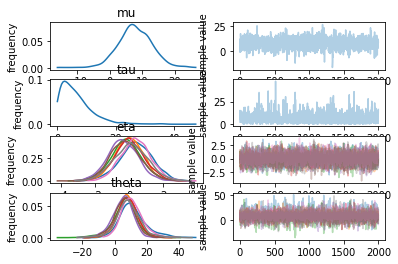

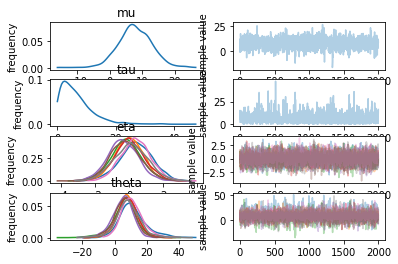

In [ ]:
# import pystan

# schools_code = """
# data {
#     int<lower=0> J; // number of schools
#     vector[J] y; // estimated treatment effects
#     vector<lower=0>[J] sigma; // s.e. of effect estimates
# }
# parameters {
#     real mu;
#     real<lower=0> tau;
#     vector[J] eta;
# }
# transformed parameters {
#     vector[J] theta;
#     theta = mu + tau * eta;
# }
# model {
#     eta ~ normal(0, 1);
#     y ~ normal(theta, sigma);
# }
# """

# schools_dat = {'J': 8,
#                'y': [28,  8, -3,  7, -1,  1, 18, 12],
#                'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

# sm = pystan.StanModel(model_code=schools_code)
# fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

# fit.plot()

##### install pymc3

In [ ]:
pip install pymc3

##### set up the model

In [ ]:
import pymc3 as pm
import theano

observed_data = data_raw.newAdmissions.copy().reset_index(drop=True).iloc[0:100]#.values
t_values = observed_data.index.values

with pm.Model() as hierarchical_model:
    # Hyperpriors for group (i.e. National) - these are the group means and sigmas
    # So here we describe the national mean S and national variance in S, etc.
    t = pm.Data("t", t_values)

    mu_S = pm.Normal('mu_S', mu=80_000., sigma=80_000)
    #sigma_S = pm.HalfNormal('sigma_S', 5.)
    mu_gamma = pm.Normal('mu_gamma', mu=9., sigma=20.0)
    #sigma_gamma = pm.HalfNormal('sigma_gamma', 5.)
    #mu_beta = pm.Normal('mu_beta', mu=-0.5, sigma=3.0)
    mu_beta = pm.Lognormal('mu_beta', mu=-0.5, sigma=5.0)
    #sigma_beta = pm.HalfNormal('sigma_beta', 5.)
    mu_alpha = pm.Normal('mu_alpha', mu=10., sigma=200)
    #sigma_alpha = pm.HalfNormal('sigma_alpha', 5.)

    # Hyperpriors for local (i.e. trust) - these are sampled around the national values (with a length of N trusts)
    # So we get a value of gamma for each trust, a value of beta for each trust and so forth.
    # Population, S, will need to be handled different as that isn't linked between the areas....
    # a = pm.Normal('a', mu=mu_a, sigma=sigma_a, shape=n_counties)
    # # Intercept for each county, distributed around group mean mu_a
    # b = pm.Normal('b', mu=mu_b, sigma=sigma_b, shape=n_counties)

    # Model error
    eps = pm.HalfCauchy('eps', 5.)

    import theano.tensor as T

    def richards_T(t,S,gamma,beta,alpha):
      return S- S / (1 + gamma * T.exp(beta * (alpha-t)))**(1 / gamma)
    def richards_grad_T(t,S, gamma, beta, alpha):
      return -1*(beta/gamma)*(1-(richards(t, S, gamma, beta, alpha)/S)**gamma)*richards_T(t,S,gamma,beta,alpha)
    #beds_est = pd.Series([richards_grad(t, mu_S, mu_gamma, mu_beta, mu_alpha) for t in range(0,len(data_raw))]).values
    beds_est = richards_grad_T(t, mu_S, mu_gamma, mu_beta, mu_alpha)
    # Data likelihood

    #observed_data = data_raw.newAdmissions.copy()#.astype(theano.config.floatX)

    beds_like = pm.Normal('beds_like', mu=beds_est,
                          sigma=eps, observed=observed_data
     )
    
    hierarchical_trace = pm.sample(2000, tune=2000, target_accept=.9)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
INFO:pymc3:Sequential sampling (2 chains in 1 job)
NUTS: [eps, mu_alpha, mu_beta, mu_gamma, mu_S]
INFO:pymc3:NUTS: [eps, mu_alpha, mu_beta, mu_gamma, mu_S]
100%|██████████| 4000/4000 [01:00<00:00, 65.84it/s] 
There were 572 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 572 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1136 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 1136 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.


In [ ]:
# # Inference button (TM)!
# with hierarchical_model:
#     hierarchical_trace = pm.sample(2000, tune=2000, target_accept=.9)

In [ ]:
map_estimate = pm.find_MAP(model=hierarchical_model)
map_estimate

/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -885.68, ||grad|| = 0.00017841: 100%|██████████| 42/42 [00:00<00:00, 1017.58it/s] 


{'eps': array(1309.20038364),
 'eps_log__': array(7.17717184),
 'mu_S': array(79999.9996688),
 'mu_alpha': array(7.94435953),
 'mu_beta': array(8.42435266e-12),
 'mu_beta_log__': array(-25.49989448),
 'mu_gamma': array(8.99973028)}

In [ ]:
sample_posterior = pm.sample_posterior_predictive(model=hierarchical_model, trace=hierarchical_trace)

100%|██████████| 4000/4000 [00:06<00:00, 663.54it/s]


In [ ]:
def richards(t,S,gamma,beta,alpha):
  return S- S / (1 + gamma * np.exp(beta * (alpha-t)))**(1 / gamma)
def richards_grad(t,S, gamma, beta, alpha):
  return -1*(beta/gamma)*(1-(richards(t, S, gamma, beta, alpha)/S)**gamma)*richards(t,S,gamma,beta,alpha)

t_out_of_sample = np.arange(len(t_values), len(t_values) + 100)

# beds out of sample used???
beds_out_of_sample = pd.Series([richards_grad(t_, map_estimate['mu_S'], map_estimate['mu_gamma'], map_estimate['mu_beta_log__'], map_estimate['mu_alpha']) for t_ in t_out_of_sample])

# this bit is where it takes the out of sample t, and then samples from the posterior get the predictions
with hierarchical_model:
    pm.set_data({"t": t_out_of_sample})
    model_preds = pm.sample_posterior_predictive(
        hierarchical_trace
    )

100%|██████████| 4000/4000 [00:06<00:00, 658.30it/s]


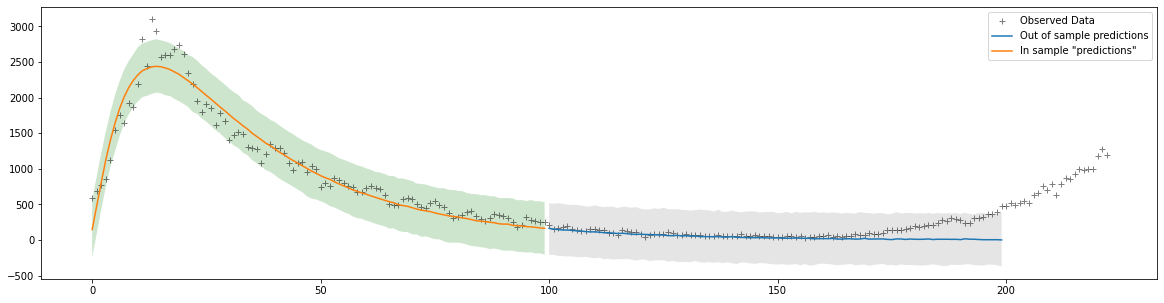

In [ ]:
lower_post_pred = np.percentile(model_preds["beds_like"],q=2.5,axis=0)  # grab lower 2.5% quantiles
upper_post_pred = np.percentile(model_preds["beds_like"],q=97.5,axis=0)  # grab Upper 92.5% quantiles
mean_post_pred = np.mean(model_preds["beds_like"], axis=0) # Media
lower_post_insample_pred = np.percentile(sample_posterior["beds_like"],q=2.5,axis=0)  # grab lower 2.5% quantiles
upper_post_insample_pred = np.percentile(sample_posterior["beds_like"],q=97.5,axis=0)  # grab Upper 92.5% quantiles
mean_post_insample_pred = np.mean(sample_posterior["beds_like"], axis=0) # Media

fig, ax = plt.subplots(figsize=(20,5))
data_raw.reset_index(drop=True).newAdmissions.rename('Observed Data').plot(color='black',marker='+',linewidth=0, alpha=0.5);
pd.Series(mean_post_pred, index=t_out_of_sample,name='Out of sample predictions').plot();
pd.Series(mean_post_insample_pred, index=t_values, name='In sample "predictions"').plot();
plt.fill_between(t_out_of_sample, upper_post_pred, lower_post_pred,
                facecolor='grey', alpha=0.2, interpolate=True);
plt.fill_between(t_values, upper_post_insample_pred, lower_post_insample_pred,
                facecolor='green', alpha=0.2, interpolate=True);
plt.legend()


KeyboardInterrupt: ignored

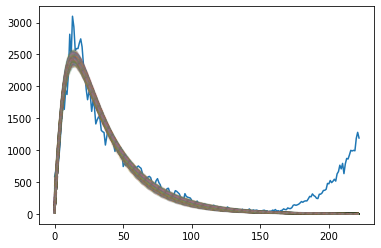

In [ ]:
params = pd.DataFrame(dict(S = hierarchical_trace['mu_S'], gamma = hierarchical_trace['mu_gamma'],beta = hierarchical_trace['mu_beta'], alpha = hierarchical_trace['mu_alpha']))

def richards(t,S,gamma,beta,alpha):
  return S- S / (1 + gamma * np.exp(beta * (alpha-t)))**(1 / gamma)
def richards_grad(t,S, gamma, beta, alpha):
  return -1*(beta/gamma)*(1-(richards(t, S, gamma, beta, alpha)/S)**gamma)*richards(t,S,gamma,beta,alpha)

data_raw.reset_index(drop=True).newAdmissions.plot()
for idx, param in params.iterrows():
  sample_plot_data = pd.Series([richards_grad(t, **param) for t in range(0,len(data_raw))]).plot(alpha=0.1, linestyle = '--')

## SEIR model
The first part of the cambridge model is an SEIR model

- **Susceptible** - people that can be infected, i.e. the population
- **Exposed** - people that have the virus, but are not yet infections (incubation)
- **Infected** - people that have the virus and **are infectious**
- **Hospitalised** - people that are subsequently hospitalised
- **Critical** - people that are subsequently moved to critical care
- **Dead** - people that died - either after infection, hospitalisation or critical care
- **Recovered** - people that recover from infection after either infection, hospitalisation or critical care

      S -> E -> I -> R
                  -> H -> R
                       -> D
                  -> H -> C -> R
                       -> C -> D

People move between the comparments with rates and probabilities

- beta: the rate at which people become exposed (contact rate) - how many people an exposed person will come into contact with
- sigma: the rate at which exposed people become infections (1 / incubation period)
- gamma: the rate at which people recover (1 / usual illness period)

In [ ]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [ ]:
!pip install lmfit

     |████████████████████████████████| 266kB 4.2MB/s 
     |████████████████████████████████| 215kB 8.2MB/s 
     |████████████████████████████████| 256kB 7.4MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.1-cp36-none-any.whl size=81991 sha256=5e7982f9486f769a7fcfd55e9ede49df57702afa763985299065a1b89040f260
  Stored in directory: /root/.cache/pip/wheels/ef/22/8d/6cd9c0af36f501cfb248673b05dad5d2c27504951d55519acb
  Created wheel for asteval: filename=asteval-0.9.19-cp36-none-any.whl size=17486 sha256=25ff0b25e64a39f869c962e906e5a0e48db18edbfab0602e3788c9a5e78fad12
  Stored in directory: /root/.cache/pip/wheels/59/da/bf/62853db4291f1c5f91326e32e4d1766b8cfcccd1c0e6eaf53f
Successfully built lmfit asteval


In [ ]:
import lmfit
from lmfit.lineshapes import gaussian, lorentzian
import numpy as np

np.random.seed(42)
x = np.linspace(1, 20.0, 1001)

data = (gaussian(x, 21, 6.1, 1.2) + np.random.normal(scale=0.1, size=x.size))  # normal distr. with some noise
def f(x, a, b, c):
    return gaussian(x, a, b, c)

def logistic(x,a,b,c):
    return 1/(1-a*np.exp(b*(c-x)))**(1/a)

mod = lmfit.Model(logistic)
# we set the parameters (and some initial parameter guesses)
mod.set_param_hint("a", value=1/9.0, vary=True)
mod.set_param_hint("b", value=2.0, vary=True)
mod.set_param_hint("c", value=10.0, vary=True)

params = mod.make_params()
result = mod.fit(data, params, method="leastsq", x=x)  # fitting
result.plot_fit(datafmt="-");

ValueError: ignored

In [ ]:
def deriv(y, t, beta, gamma, sigma, N, Beds):
    S, E, I, H, C, R, D = y

    p_I_to_H = 1/10.0 # 10% of people? -> needs to be age dependent
    r_I_to_H = 1/12.0 # twelve days
    p_I_to_R = 1 - p_I_to_H
    r_H_to_C = 1/7.0 # go to critical care after one week
    p_H_to_C = 1/10.0 # 10% of people go to critical
    p_H_to_D = 1/100 # 1 in 100 die from hospital
    r_H_to_D = 1/3.0 # over three days they might die so quickly (guess!)
    p_H_to_R = 1 - p_H_to_C # - p_H_to_D
    r_H_to_R = 1/6.5 # 1 week in hospital to recovery
    p_C_to_D = 0.4 # 40% die in critical
    r_C_to_D = 1/7.5
    p_C_to_R = 1 - p_C_to_D
    r_C_to_R = 1/6.5
    C_bed_cap = min(Beds(t),C) # C capped at the number of Beds -> can't have more people than beds
    C_bed_overflow = max(0, C - Beds(t)) # the difference between C and the Beds (floored at 0) -> these guys die
    H_bed_cap = H #min(H_Beds(t), H) # -> assume infinite hospital beds
    H_bed_overflow = 0 #max(0,H - H_Beds(t)) # -> assume infinite hosp beds so no overflow

    dSdt = -beta(t) * I * S / N
    dEdt = beta(t) * I * S / N - sigma * E
    dIdt = (sigma * E 
            - r_I_to_H * p_I_to_H * I  # -> I to hospital
            - gamma * p_I_to_R * I) # -> I to recovered
    dHdt = (r_I_to_H * p_I_to_H * I # people arrive from infected
            - r_H_to_C * p_H_to_C * H_bed_cap # -> Hospital to Critical Care
            - r_H_to_D * p_H_to_D * H_bed_cap # -> hospital to dead for people with a bed
            #- 1 * 1 * H_bed_overflow # -> hospital to dead for people without a bed (100%)
            - r_H_to_R * p_H_to_R * H_bed_cap) # Hospital to recovered with a bed
    dCdt = (r_H_to_C * p_H_to_C * H_bed_cap # people arrive from hospital
            - r_C_to_D * p_C_to_D * C_bed_cap # critical to dead with a bed
            - 1 * 1 * C_bed_overflow #  critical to dead without a bed (100%)
            - p_C_to_R * r_C_to_R * C_bed_cap # critical to recover with bed (not likely normally, however assumption that simplifies the model)
    )
    dRdt = (p_I_to_R * gamma * I # Infected to Recover
           + p_H_to_R * r_H_to_R * H_bed_cap # Hospital to recover
           + p_C_to_R * r_C_to_R * C_bed_cap # Critical to recover
           )
    dDdt = (r_H_to_D * p_H_to_D * H_bed_cap # hostpial to dead with a bed 
           + r_C_to_D * p_C_to_D * C_bed_cap  # critical to dead with a bed
           #+ 1 * 1 * H_bed_overflow # hospital to dead, no bed (100%)
           + 1 * 1 * C_bed_overflow # critical to dead, no bed (100%)
           )
    dydt = pd.Series(dict(dSdt=dSdt, dEdt=dEdt, dIdt=dIdt, dHdt=dHdt, dCdt=dCdt, dRdt=dRdt, dDdt=dDdt))
    #print(dydt.sum(), end=', ') # I've get extra people!!! Need to reformulate the equations so that doesn't happen...
    return dydt

In [ ]:
gamma = 1.0/9.0
sigma = 1.0/3.0

def logistic_R_0(t, R_0_start, k, x0, R_0_end):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

In [ ]:
def Model(days, agegroups, beds_per_100k, R_0_start, k, x0, R_0_end, s):

    def beta(t):
        return logistic_R_0(t, R_0_start, k, x0, R_0_end) * gamma

    N = sum(agegroups)
    
    def Beds(t):
        beds_0 = beds_per_100k / 100_000 * N
        return beds_0 + s*beds_0*t  # 0.003

    #y0 = N-1.0, 1.0, 0.0, 0.0, 0.0, 0.0
    y0 = pd.Series(dict(S = N-1, E = 30, I=0, H=0, C=0, R=0, D=0))
    t = np.linspace(0, days-1, days)
    ret = odeint(deriv, y0.tolist(), t, args=(beta, gamma, sigma, N, Beds))
    S, E, I, H, C, R, D = ret.T
    R_0_over_time = [beta(i)/gamma for i in range(len(t))]
    Beds = [Beds(i) for i in range(len(t))]
    
    probs = dict()
    rates = dict()
    return dict(t=t, S=S, E=E, I=I,H=H, C=C, R=R, D=D, R_0=R_0_over_time, B=Beds, probs=probs, rates=rates)

In [ ]:
def plotter(model_result,#t, S, E, I, H, C, R, D, R_0, B, probs, rates, 
            x_ticks=None):
    fig, ax = plt.subplots(2,3,figsize=(30,10))
    plot_x = model_result['t'] if x_ticks is None else x_ticks
    plot_kwargs = dict(alpha=0.7, linewidth=2,)
    plot_max = [model_result['S'].max()*1.05, model_result['I'].max()*1.05, model_result['D'].max()*1.05]
    for idx, ax_ in enumerate(ax[0]):
        ax_.plot(plot_x, model_result['S'], 'b', **plot_kwargs, label='Susceptible')
        ax_.plot(plot_x, model_result['E'], 'y', **plot_kwargs, label='Exposed')
        ax_.plot(plot_x, model_result['I'], 'r', **plot_kwargs, label='Infected')
        ax_.plot(plot_x, model_result['H'], 'r:', **plot_kwargs, label='Hospital')
        ax_.plot(plot_x, model_result['C'], 'r--', **plot_kwargs, label='Critical')
        ax_.plot(plot_x, model_result['R'], 'g', **plot_kwargs, label='Recovered')
        ax_.plot(plot_x, model_result['D'], 'k', **plot_kwargs, label='Dead')
        pd.DataFrame(dict(S=model_result['S'],E=model_result['E'],I=model_result['I'],H=model_result['H'],C=model_result['C'],
                          R=model_result['R'],D=model_result['D']),index=pd.Series(model_result['t'],name='t')).sum(axis=1).rename("Total").plot(ax=ax_)
        ax_.set_ylim(0,plot_max[idx])
        ax_.grid(b=True, which='major', c='w', lw=2, ls='-')
        legend = ax_.legend()
        legend.get_frame().set_alpha(0.5)
    
    fig.suptitle('extended SEIR-Model')

    ax[1][0].plot(plot_x, model_result['B'], 'b', **plot_kwargs, label='Beds')
    ax[1][0].legend()
    ax[1][1].plot(plot_x, model_result['R_0'], 'r', **plot_kwargs, label='R_0')
    ax[1][1].legend()

    # for spine in ('top', 'right', 'bottom', 'left'):
    #     ax.spines[spine].set_visible(False)
    plt.show();

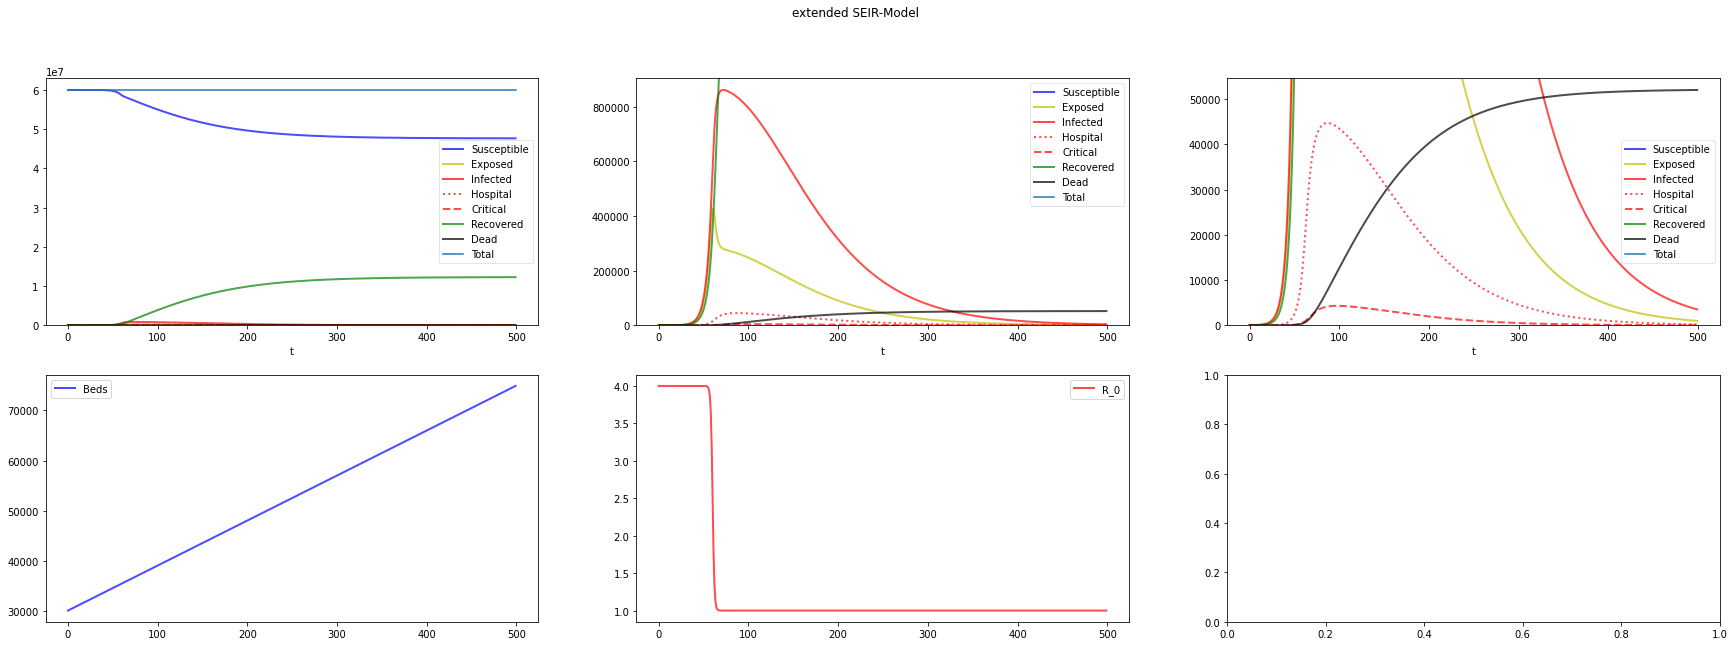

In [ ]:
plotter(Model(days=500, agegroups=[60_000_000], 
               beds_per_100k= 50
                , R_0_start=4.0, k=1.0, x0=60, R_0_end=1.0, s=0.003)
        )

## Gaussian Processes
These aren't as complex as they first appear. Basically, it's a bayesian method which produces distributions of functions defined by two things: 
- the **mean function** (which describes the trend of all these functions)
- the **kernel** (which describes the distance these functions can be from the mean).

Notation of Gaussian process is like this: `GP(mean, K)`

To use this to make predictions you define the form of the gaussian process (Which is basically the kernel you want it to have), and then you fit it to your "X" (i.e. time) and your "y" (i.e. hospitalisations). This **fitting** process **works out the mean function**. You can then make predictions by supplying a set of X_pred and get corresponding y_pred. 

Some example code is below, fitting a gaussian process to hospital data:

In [ ]:
from typing import Iterable, Dict, Union, List
from json import dumps
from requests import get
from http import HTTPStatus
import pandas as pd


StructureType = Dict[str, Union[dict, str]]
FiltersType = Iterable[str]
APIResponseType = Union[List[StructureType], str]


def get_paginated_dataset(filters: FiltersType, structure: StructureType,
                          ) -> APIResponseType:
    """
    Extracts paginated data by requesting all of the pages
    and combining the results.

    Parameters
    ----------
    filters: Iterable[str]
        API filters. See the API documentations for additional
        information.

    structure: Dict[str, Union[dict, str]]
        Structure parameter. See the API documentations for
        additional information.

    Returns
    -------
    pd.DataFrame
        The data for the given ``filters`` and ``structure``.
    """
    endpoint = "https://api.coronavirus.data.gov.uk/v1/data"
    api_params = dict(filters=str.join(";", filters),
                      structure=dumps(structure, separators=(",", ":")), 
                      format="json", page=1)
    data = list()
    page_number = 1
    current_data = dict(pagination={'next':True}) # dummy initial "next" pagination

    while current_data["pagination"]["next"] is not None:
        api_params["page"] = page_number
        response = get(endpoint, params=api_params, timeout=10)

        if response.status_code >= HTTPStatus.BAD_REQUEST:
            raise RuntimeError(f'Request failed: {response.text}')
        elif response.status_code == HTTPStatus.NO_CONTENT:
            break

        current_data = response.json()
        page_data: List[StructureType] = current_data['data']
        
        data.extend(page_data)

        page_number += 1

    return pd.DataFrame(data)


if __name__ == "__main__":
    query_filters = [
        f"areaType=nation;areaName=england"
    ]

    query_structure = {
        "date": "date",
        "name": "areaName",
        "code": "areaCode",
        "newAdmissions": "newAdmissions",
    }

  # newCasesByPublishDate - New cases by publish date
  # cumCasesByPublishDate - Cumulative cases by publish date
  # cumCasesBySpecimenDateRate - Rate of cumulative cases by publish date per 100k resident population
  # newCasesBySpecimenDate - New cases by specimen date
  # cumCasesBySpecimenDateRate - Rate of cumulative cases by specimen date per 100k resident population
  # cumCasesBySpecimenDate - Cumulative cases by specimen date
  # maleCases - Male cases (by age)
  # femaleCases - Female cases (by age)
  # newPillarOneTestsByPublishDate - New pillar one tests by publish date
  # cumPillarOneTestsByPublishDate - Cumulative pillar one tests by publish date
  # newPillarTwoTestsByPublishDate - New pillar two tests by publish date
  # cumPillarTwoTestsByPublishDate - Cumulative pillar two tests by publish date
  # newPillarThreeTestsByPublishDate - New pillar three tests by publish date
  # cumPillarThreeTestsByPublishDate - Cumulative pillar three tests by publish date
  # newPillarFourTestsByPublishDate - New pillar four tests by publish date
  # cumPillarFourTestsByPublishDate - Cumulative pillar four tests by publish date
  # newAdmissions - New admissions
  # cumAdmissions - Cumulative number of admissions
  # cumAdmissionsByAge - Cumulative admissions by age
  # cumTestsByPublishDate - Cumulative tests by publish date
  # newTestsByPublishDate - New tests by publish date
  # covidOccupiedMVBeds - COVID-19 occupied beds with mechanical ventilators
  # hospitalCases - Hospital cases
  # plannedCapacityByPublishDate - Planned capacity by publish date
  # newDeaths28DaysByPublishDate - Deaths within 28 days of positive test
  # cumDeaths28DaysByPublishDate - Cumulative deaths within 28 days of positive test
  # cumDeaths28DaysByPublishDateRate - Rate of cumulative deaths within 28 days of positive test per 100k resident population
  # newDeaths28DaysByDeathDate - Deaths within 28 days of positive test by death date
  # cumDeaths28DaysByDeathDate - Cumulative deaths within 28 days of positive test by death date
  # cumDeaths28DaysByDeathDateRate - Rate of cumulative deaths within 28 days of positive test by death date per 100k resident population

    data_raw = get_paginated_dataset(query_filters, query_structure)



/usr/local/lib/python3.6/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


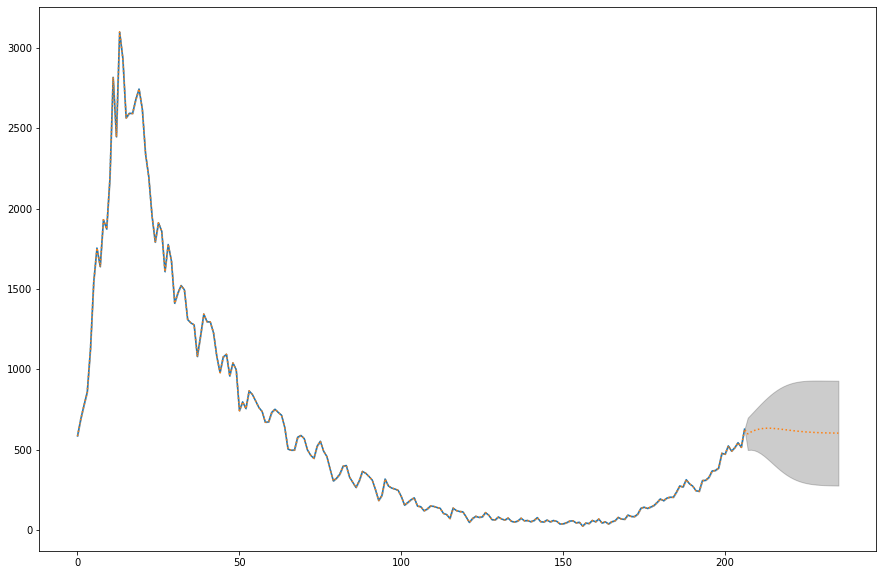

In [ ]:
import sklearn.gaussian_process as skl_gp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel,WhiteKernel)

data = data_raw.assign(date=pd.to_datetime(data_raw['date'])).sort_values('date').reset_index(drop=True).iloc[:-10,:]
data.tail()

# The kernel is critical!!!!!
kernel = ConstantKernel(0.1, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-3, 1e3))
          #      * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2),
          #  1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
          #               nu=1.5)
# Kernel with parameters given in GPML book
k1 = 66.0**2 * RBF(length_scale=67.0)  # long term smooth rising trend
k2 = 2.4**2 * RBF(length_scale=90.0) \
    * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # seasonal component
# medium term irregularity
k3 = 0.66**2 \
    * RationalQuadratic(length_scale=1.2, alpha=0.78)
k4 = 0.18**2 * RBF(length_scale=0.134) \
    + WhiteKernel(noise_level=0.19**2)  # noise terms
kernel_gpml = k1 + k1 + k2 + k3 + k4
model = skl_gp.GaussianProcessRegressor(kernel=kernel_gpml,normalize_y=True,n_restarts_optimizer=10)

X_pred = np.atleast_2d(np.arange(data.index[0], data.index[-1]+30)).T
model.fit(data.index.values.reshape(-1, 1),data.newAdmissions.values.reshape(-1, 1))
y_pred, y_std = model.predict(X_pred, return_std=True)
pred_data = pd.DataFrame(index=X_pred.ravel()).assign(newAdmissions=y_pred,newAdmissions_std=y_std)

data['newAdmissions'].plot(figsize=(15,10))
pred_data['newAdmissions'].plot(linestyle=':')
plt.fill_between(pred_data.index.to_list(), pred_data.newAdmissions - pred_data.newAdmissions_std, pred_data.newAdmissions + pred_data.newAdmissions_std,
                     alpha=0.2, color='k')

In [ ]:
pip install gpy

     |████████████████████████████████| 1.0MB 5.6MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
  Created wheel for gpy: filename=GPy-1.9.9-cp36-cp36m-linux_x86_64.whl size=2633967 sha256=63a62f1a88db71a7975475bd9190c04ab4ce2d3dd9f699d874e8607e43b232a8
  Stored in directory: /root/.cache/pip/wheels/5d/36/66/2b58860c84c9f2b51615da66bfd6feeddbc4e04d887ff96dfa
  Created wheel for paramz: filename=paramz-0.9.5-cp36-none-any.whl size=102551 sha256=4ad10263b8b4555f7ca738ff026f556d1838b8856999a452ae43405a067f8976
  Stored in directory: /root/.cache/pip/wheels/c8/4a/0e/6e0dc85541825f991c431619e25b870d4b812c911214690cf8
Successfully built gpy paramz


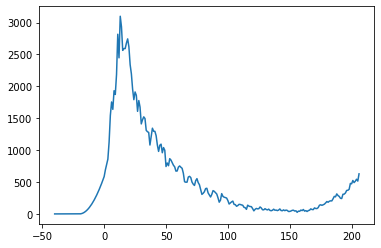

In [ ]:
data_plus_0_point = pd.concat([pd.DataFrame(index=range(data.index[0]-40,data.index[0]-1)),data])
data_plus_0_point.loc[[-40,-20],'newAdmissions'] = 0
data_plus_0_point['newAdmissions'] = data_plus_0_point.newAdmissions.interpolate(method='pchip', limit_direction='both', limit=None)
data_plus_0_point['newAdmissions'].plot()

 /usr/local/lib/python3.6/dist-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /usr/local/lib/python3.6/dist-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /usr/local/lib/python3.6/dist-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply


(-10.0, 3200.0)

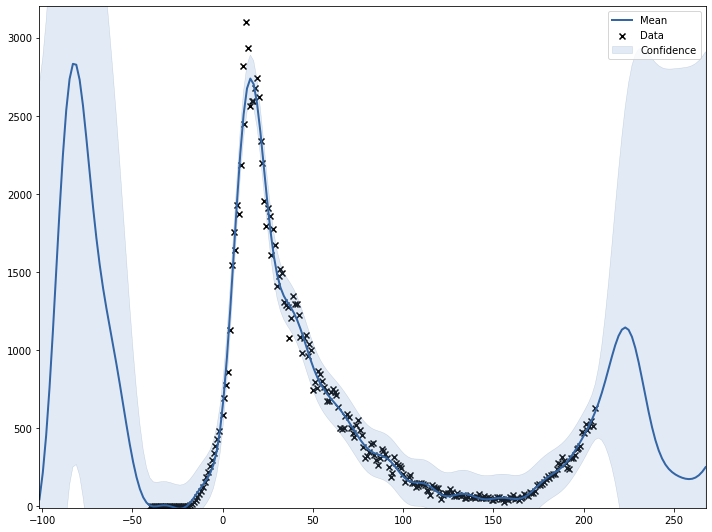

In [ ]:
import GPy
from IPython.display import display

RBF_short = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1., name='short')  # gently sloping - the next value is near the value before
# RBF_long = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=100., name ='long')
# RBF_long.lengthscale.fix()
#linear = (GPy.kern.Linear(1,) + GPy.kern.Bias(1, 1))* GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.) # 
noise = GPy.kern.White(input_dim=1,name='noise') # noise
noise.variance=0.001
noise.fix()
periodic = GPy.kern.Prod([GPy.kern.RBF(input_dim=1, variance=100, lengthscale=10),
                          GPy.kern.StdPeriodic(1,variance=100,lengthscale=10, period=100)],name='periodic') #trying long term repetition
periodic.std_periodic.period.fix()
#periodic.std_periodic.lengthscale.fix()

kernel = GPy.kern.Add([periodic])

m = GPy.models.GPRegression(X=data_plus_0_point.index.values.reshape(-1, 1),
                  Y=data_plus_0_point[['newAdmissions']].values,
                  kernel=kernel,
                  normalizer=True)
m.optimize(messages=True);
ax = m.plot(figsize=(10,7.5),plot_density=False)
#plt.xlim(-40,data.index[-1]+21)
plt.ylim(-10,3200)

{'covariance': [[<matplotlib.lines.Line2D at 0x7f0f032519b0>]]}

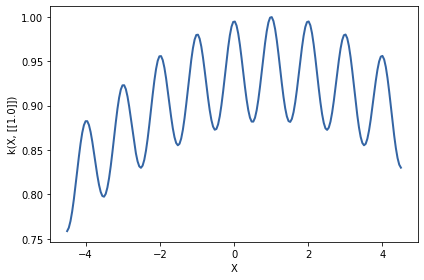

In [ ]:
 GPy.kern.Prod([GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1e1),
                          GPy.kern.StdPeriodic(1,variance=1.,lengthscale=2, period=1.)]).plot()#plot_limits=np.array([-100,300]))

(-10.0, 3200.0)

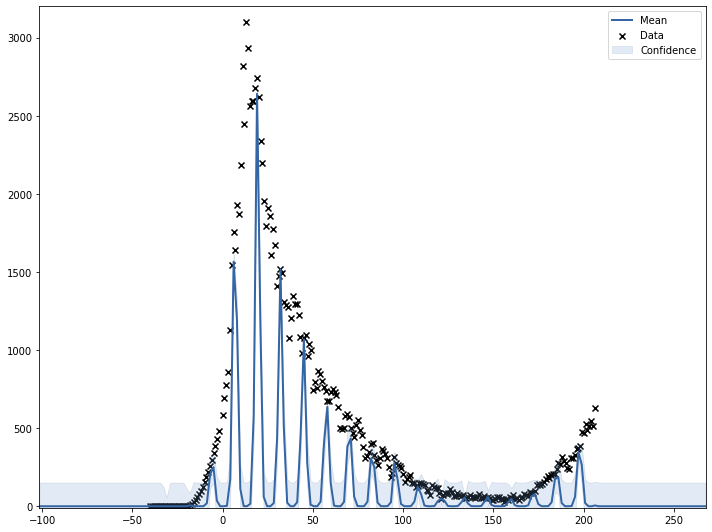

In [ ]:
ax = m.plot(figsize=(10,7.5),plot_density=False)
#plt.xlim(-40,data.index[-1]+21)
plt.ylim(-10,3200)

 /usr/local/lib/python3.6/dist-packages/GPy/kern/src/standard_periodic.py:132: RuntimeWarning:overflow encountered in square


{'dataplot': [<matplotlib.collections.PathCollection at 0x7f6d04c62710>],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f6d050ee6a0>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f6d050ee908>]]}

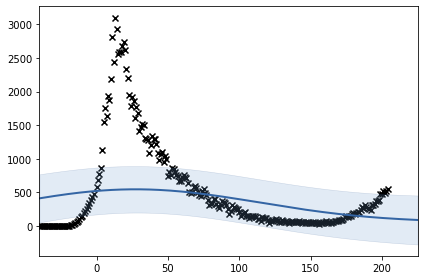

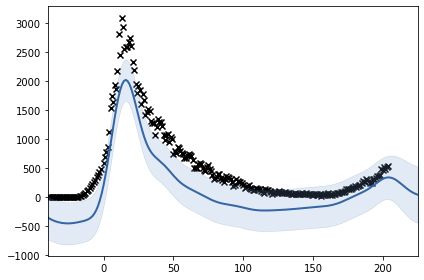

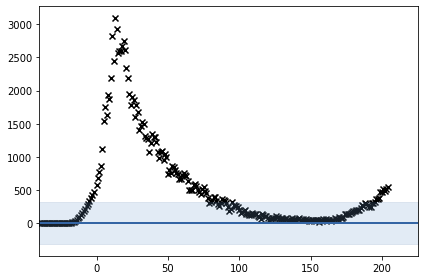

In [ ]:
m.plot(plot_limits=[-40,data.index[-1]+21],predict_kw=dict(kern=m.kern.long),plot_data=True, legend=False);
m.plot(plot_limits=[-40,data.index[-1]+21],predict_kw=dict(kern=m.kern.short),plot_data=True, legend=False);
m.plot(plot_limits=[-40,data.index[-1]+21],predict_kw=dict(kern=m.kern.periodic),plot_data=True, legend=False)
#m.plot(plot_limits=[-40,data.index[-1]+21],predict_kw=dict(kern=m.kern.noise),plot_data=True, legend=False)

 /usr/local/lib/python3.6/dist-packages/GPy/kern/src/standard_periodic.py:132: RuntimeWarning:overflow encountered in square


(-10.0, 3200.0)

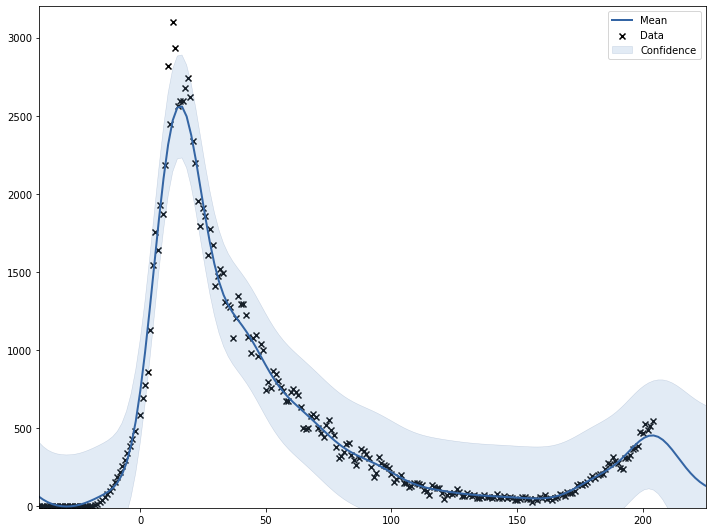

In [ ]:
ax = m.plot(figsize=(10,7.5),plot_density=False)
plt.xlim(-40,data.index[-1]+21)
plt.ylim(-10,3200)

In [ ]:
kernel_pairs = [(k_1, k_2) for k_1 in ["RBF", "linear", "seasonal", "white", "Mat"] for k_2 in ["RBF", "linear", "seasonal", "white", "Mat"]]
kernel_pairs
k1 = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)  # gently sloping - the next value is near the value before
k2 = GPy.kern.Linear(1) * GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
k3 = GPy.kern.ExpQuad(input_dim=1, lengthscale=7)
k4 = GPy.kern.White(input_dim=1)
k5 = GPy.kern.Matern32(1, 0.5, 0.2)
kernels = dict(RBF=k1, linear=k2, seasonal=k3, white=k4, Mat=k5)

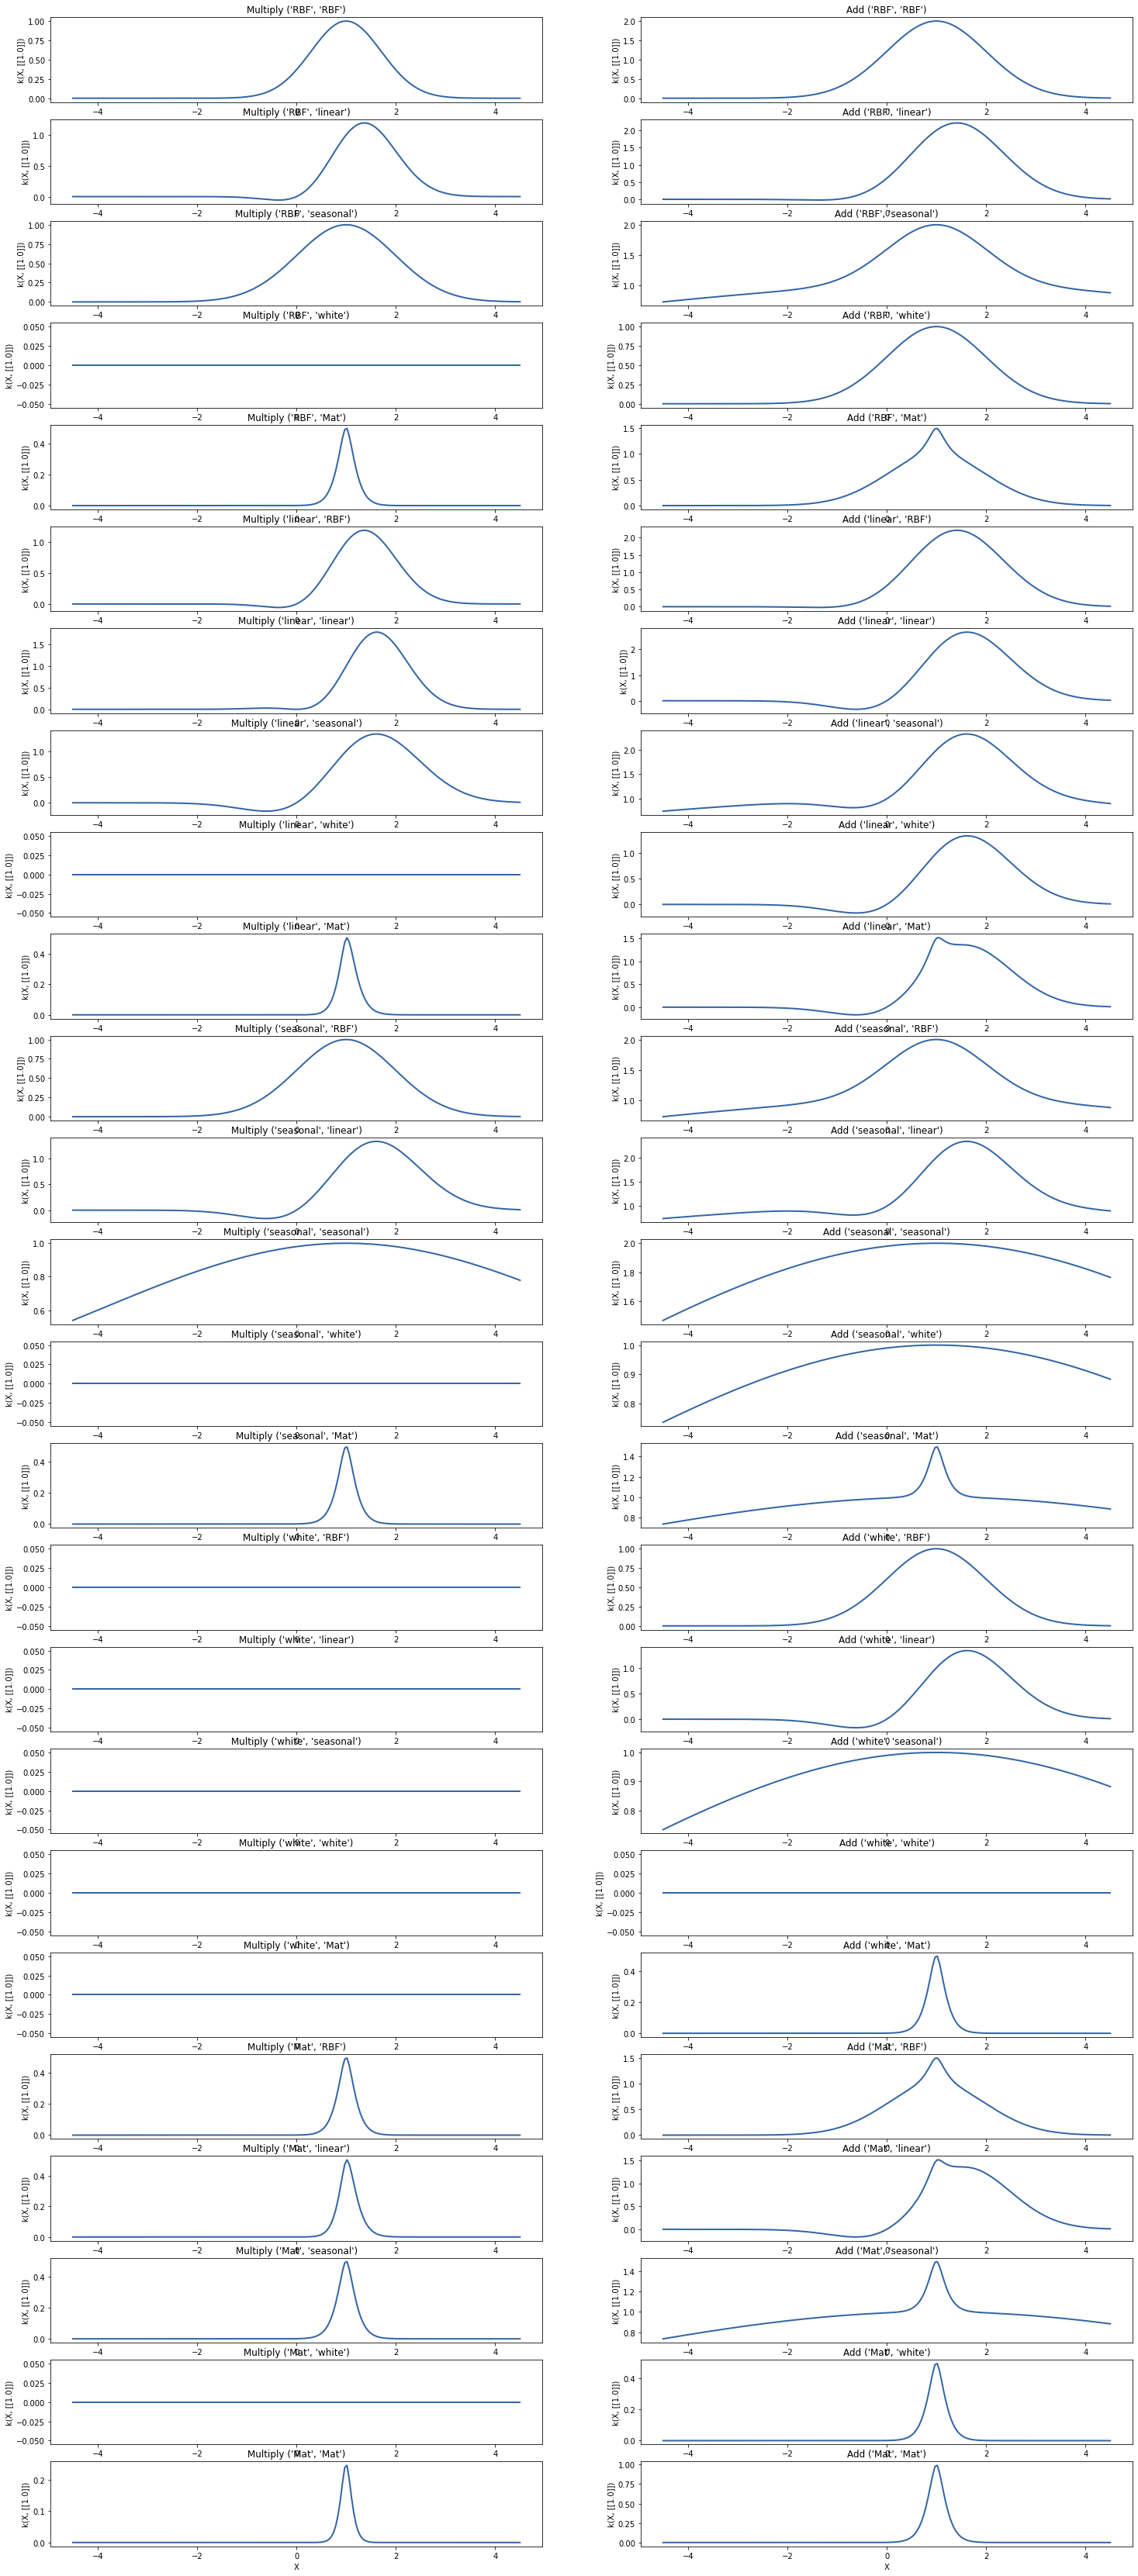

In [ ]:
fig, ax = plt.subplots(len(kernel_pairs),2, figsize=(25,60))
for idx, kernel_pair in enumerate(kernel_pairs):
  ax_ = ax[idx]

  k_prod = kernels[kernel_pair[0]]*kernels[kernel_pair[1]]
  ax_[0].set_title(f"Multiply {kernel_pair}")
  k_prod.plot(ax=ax_[0])
  
  k_add = kernels[kernel_pair[0]] + kernels[kernel_pair[1]]
  ax_[1].set_title(f"Add {kernel_pair}")
  k_add.plot(ax=ax_[1])
